<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive-into-Deep-Learning-Notes-/blob/main/09_RNNs_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00


## 9.1 Working with Sequences

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch import nn
from d2l import torch as d2l

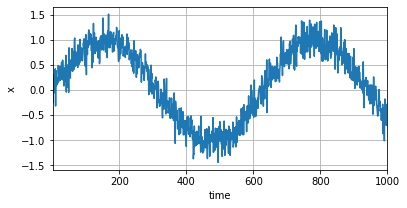

In [7]:
T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.randn(T) * 0.2

fig = plt.figure(figsize=(6, 3))
plt.plot(time, x)
plt.xlabel('time')
plt.ylabel('x')
plt.xlim([1, 1000])
plt.grid(True)


The following code snippet converts the mentioned sequence to tabular data that can be used as data for linear regression. $\tau = 4$ indicates that our dataset has four features ($x_1 (0 - 996), x_2 (1 - 997), x_3 (2 - 998), x_4 (3 - 999)$), each feature has 996 elemens, and one label ($y (4 - 1000)$) that also has 996 elements.  

In [30]:
tau = 4
num_train = 600
batch_size = 16

features = [x[i: T - tau + i] for i in range(tau)]
print('Feature length:', len(features))
print('Each featute shape:', features[0].shape)

print('********************')

features = torch.stack(features, 1) # stack the features along the columns
print('Features stack together (shape): ',features.shape)

print('********************')

labels = x[tau:]
print('Labels shape: ',labels.shape)
lebels = labels.reshape((-1, 1))            # num of columns = 1, and num of rows are inferred from the size.
print('labels shape: ',labels.shape)

Feature length: 4
Each featute shape: torch.Size([996])
********************
Features stack together (shape):  torch.Size([996, 4])
********************
Labels shape:  torch.Size([996])
labels shape:  torch.Size([996])


## 9.2 Converting Raw Text into Sequence Data

In [ ]:
import random
import re
import torch
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


* Python `random` Module: This module can be sued to generate random numbers.
* Python `re` library: A regular expression (or re) specifies a set of strings that matches it.
* `re.sub()`: This function retruns a string where all amtching occurances of the specified pattern are replaced by the replace string.

In [ ]:
my_string = 'My name is Davood'

my_string1 = re.sub('v', 'b', my_string)

print(my_string)
print(my_string1)

My name is Davood
My name is Dabood


In [ ]:
class TimeMachine(d2l.DataModule):
  def _download(self):
    fname = d2l.download(d2l.DATA_URL + 'timemachine.txt', self.root,
                         '090b5e7e70c295757f55df93cb0a180b9691891a')
    with open(fname) as f:
      return f.read()

In [ ]:
data = TimeMachine()
raw_text = data._download()
raw_text[:60]

'The Time Machine, by H. G. Wells [1898]\n\n\n\n\nI\n\n\nThe Time Tra'

In [ ]:
@d2l.add_to_class(TimeMachine)
def _preprocess(self, text):
  return re.sub('[^A-Za-z]+', ' ', text).lower() # replaces '[^A-Za-z]+' in the text with space.

In [ ]:
text = data._preprocess(raw_text)
text[0:60]

'the time machine by h g wells i the time traveller for so it'

In [ ]:
list(text[0:10])  # creates a list of the given string

['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm']

* Python `join()`: Is an built-in string function in Python used to join elements of the sequence seperated by a string operator.

In [ ]:
my_list = ['Davood', 'Soleymanzadeh']

' '.join(my_list) # joins the elements in my list seperated by an space

'Davood Soleymanzadeh'

#### Nested List in Python
* List comprehension is one of the unique features of Python which allows to create lists by iterating over an iteratable object.
* Nested list comprehension are list comprehension within another list comprehension which is similar to nested for loops.

In [ ]:
# Flattening a 2-D list

my_list = [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]

flatten_list = [val for sublist in my_list for val in sublist]
flatten_list

In [ ]:
@d2l.add_to_class(TimeMachine)
def _tokenize(self, text):
  return list(text)

In [ ]:
tokens = data._tokenize(text)

# When tokens is a nested list, the following will flatten the list
if tokens and isinstance(tokens[0], list):
  tokens = [token for line in tokens for token in line]

* `Counter()` Class in `collection`s module: A counter is a container that stores elements as **dictionary keys**, and their counts are stored as **dictionary values**.


In [ ]:
import collections

my_name = 'Davood Soleymanzadeh'

my_counter = collections.Counter(my_name)
my_counter

In [ ]:
counter = collections.Counter(tokens)
counter

* Python built-in `sorted()` function: returns a sorted list from the iterable object.

In [ ]:
my_list = [4, 1, 3, 2]

print(sorted(my_list))
print(sorted(my_list, reverse=True))

[1, 2, 3, 4]
[4, 3, 2, 1]


* The `key(optional)` argument in `sorted()` is a function that would serve as a key or basis for sort comparison.

In [ ]:
my_dict = {'Akbar': 35, 'Mohsen': 32, 'Ahmad': 29, 'Davood': 24}

print(sorted(my_dict))   # Sorted based on strings
print(sorted(my_dict, key=lambda x: x[0])) # sorted based on keys
print(sorted(my_dict, key=lambda x: x[1])) # sorted based on values

['Ahmad', 'Akbar', 'Davood', 'Mohsen']
['Akbar', 'Ahmad', 'Davood', 'Mohsen']
['Davood', 'Ahmad', 'Akbar', 'Mohsen']


In [ ]:
token_freqs = sorted(counter.items(), key=lambda x: x[1],    # sorted based on the values of each character in the string
                              reverse=True)
token_freqs

* `set()` in Python: A set is an unordered collection data type that is iterable, mutable, and has no duplicate elements. Since sets are unordered, we cannot access items using indexes as we do in lists.

In [ ]:
set(['<unk>'] + [token for token, freq in token_freqs])

In [ ]:
idx_to_token = list(sorted(set(['<unk>'] + [token for token, _ in token_freqs])))
idx_to_token, len(idx_to_token)

In [ ]:
token_to_idx = {token: idx for idx, token in enumerate(idx_to_token)}
token_to_idx

* Python dictionary `get()` method: Returns the value for the given key if present in the dictionary. If not, the it will return a None.

In [ ]:
my_dict = {'Akbar': 35, 'Mohsen': 32, 'Ahmad': 29, 'Davood': 24}

print(my_dict.get('Davood'))

24


* Python `__len__()` magic method: It is basically used to implement the 'len()' function in Python.

In [ ]:
class Person:
  def __init__(self, name :str, age :int):
    self.name = name
    self.age = age

  def __len__(self):           # whenever len() is called on a Person object, it will return the age!!
    return self.age

person1 = Person('Davood', 29)
len(person1)

29

* Python `__getitem__()` in Python: When used in a class, allows its instance to use the [] (indexer) operator.

In [ ]:
class Student:
  def __init__(self, name :str, scores=None):
    self.name = name
    self.scores = scores

  def __getitem__(self, key):
    return self.scores[key]

student1 = Student('Davood', [100, 90, 85])
print(student1[0])
print(student1[1])
print(student1[2])

* Python string `split()` method: split a string into a list of strings after breaking the given string by the specified seperator.

In [ ]:
my_string = 'Davood Soleymanzadeh'

my_list = my_string.split()
my_list[1:], my_list[:-1]

(['Soleymanzadeh'], ['Davood'])

In [ ]:
words = text.split() # creates a list of each word 

In [ ]:
bigram_tokens = ['--'.join(pair) for pair in zip(words[:-1], words[1:])]  # This will join words that are next to each other.


## 9.3 Language Models

### Understanding Slicing

* `a[start:stop]`: Items start through stop -1.
* `a[start:]`: Items start through the rest of the array.
* `a[:stop]`: Items from the beginning through step -1.
* `a[:]`: A copy of the whole array.
* `a[start:stop:step]`: Start through not past stop, by step. step can be a negative number.

* `a[-1]`: Last item in the array.
* `a[-2:]`: last two items in the array.
* `[a:-2]`: Everything except the last two items.
* `a[::-1]`: All items in the array, reversed.
* `a[1::-1]`: The first two items reversed.
* `a[:-3:-1]`: The last two items reversed.
* `a[-3::-1]`: Everything expect the last two items.

A slice object can represent a slicing operation.

* `a[slice(start, stop, step)]` is equivalent to `a[start, stop, step].` 

In [ ]:
num_train = 10

idx = slice(0, num_train)
idx

slice(0, 10, None)

In [ ]:
num_val = 5

idx1 = slice(num_train, num_train + num_val)
idx1

slice(10, 15, None)

## 9.4 Recurrent Neural Networks

* `torch.randn(size)`: Returns a tensor filled with random numbers from a normal distribution with mean zero and variance 1.
* `torch.normal(mean, std)`: Returns a tensor of random numbers drawn from separate normal distributions whose mean and standard deviation are given.

In [ ]:
import torch

X = torch.randn(size=(2, 2)) # mean =0, std = 1
X

tensor([[ 0.3658,  0.9451],
        [-1.1638,  2.0283]])

In [ ]:
X = torch.normal(mean=0.5, std=torch.arange(1., 6.))
X

tensor([ 1.0615,  1.1878, -4.8348, -2.1433,  1.8138])

In [ ]:
X = torch.normal(mean=2, std=3, size=(2, 2))
X

tensor([[-1.2760,  5.7879],
        [ 1.1504,  3.7919]])

* `torch.cat(tensors, dim)`: Concatenates the given sequence of tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be empty.
* `torch.stack(tensors, dim)`: Concatenates a sequence of tensors along a new dimension.

In [ ]:
X = torch.randn(4, 3)
Y = torch.randn(4, 1)

Z = torch.cat((X, Y), dim=1) # dim=0 along rows, dim=1 along columns
# Z = torch.stack((X, Y), dim=1)   # Tensors should be of equal size.
Z, Z.shape

(tensor([[-1.6073,  0.5850,  1.5860, -1.2851],
         [-0.6883, -0.5976,  0.1381,  1.4761],
         [-0.5060,  1.5860, -0.0240, -0.0226],
         [-1.3699, -0.7667, -0.0681, -0.7348]]), torch.Size([4, 4]))

In [ ]:
X = torch.randn(4, 3)
Y = torch.randn(4, 3)

Z = torch.stack((X, Y), dim=0)  # along rows
Z1 = torch.stack((X, Y), dim=1) # along columns

Z.shape, Z1.shape

(torch.Size([2, 4, 3]), torch.Size([4, 2, 3]))

## 9.5 Recurrent Neural Network Implementation from Scratch

In [ ]:
# for loop over multi-dimensional PyTorch Tensors

X = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

for x in X:      # loops over the first index of the tensor (rows)
  print(x)

tensor([1, 2, 3])
tensor([4, 5, 6])
tensor([7, 8, 9])


* Python built-in `math` module: This module provides access to the mathematical functions defined by C standard.
* `torch.nn.functional.one_hot(tensor, num_classes = -1 (int))`: Takes LongTensor with index values of shape `*` and retuns a tensor of shape (`*`, `num_classes`) that have zero everywhere except where the index of last dimension matches the corresponding value of the input tensor, in which case it will be 1. If `num_classes` set to -1, the number of classes will be inferred as one greater than the largest class value in the input tensor.

In [ ]:
from torch.nn import functional as F

X1 = F.one_hot(torch.tensor([1, 2]))
X2 = F.one_hot(torch.tensor([0, 2]), num_classes=5)

X1, X2

(tensor([[0, 1, 0],
         [0, 0, 1]]), tensor([[1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0]]))

In [ ]:
my_tensor = torch.tensor([[1, 2],
                          [3, 1]])
X3 = F.one_hot(my_tensor)

X3

tensor([[[0, 1, 0, 0],
         [0, 0, 1, 0]],

        [[0, 0, 0, 1],
         [0, 1, 0, 0]]])

## 9.6 Concise Implementation of Recurrent Neural Networks

* Class `torch.nn.RNN(input_size, hidden_state)`: Applies a multi-layer Elman RNN with *tanh* or *ReLU* non-linearity to an input sequence.
* `input_size`: The number of expected features in the input, x.
* `hidden_size`: The number of features in the hidden state, h.
* `batch_first`: If `True`, then the input and output tensors are provided as (*batch, seq, feature*) instead of (*seq, batch, feature*). Default: `False`.

In [ ]:
import torch
from torch import nn

rnn = nn.RNN(input_size=10, hidden_size=20)

* Inputs: `input`, `h_0`:
* `input`: Tensor of shape ($L, H_{in}$) for unbatched input, ($L, N, H_{in}$) when `batch_first=False` or ($N, L, H_{in}$) when `batch_first=True` containing the features of the input sequence. $N$ is batch size, $L$ is sequence length, and $H_{in}$ is input size.
* `h_0`: Tensor of shape ($D$ * `num_layers`, $H_{out}$) for unbatched input, or ($D$ * `num_layers`, $N$, $H_{out}$), containing the initial hidden state for the input sequence batch. Default to zero if not provided. $D = 2$ if `bidirectional = True`, otherwise 1, and $H_{out}$ is `hidden_size`

In [ ]:
input = torch.randn(5, 3, 10) # sequence length * batch_size, input_size
h0 = torch.randn(1, 3, 20)    # D * num_layers * batch_size, hidden_size.

* Outputs: `output`, `h_n`
* `output`: Tensor of shape ($L$, $D$ * $H_{out}$) for unbatched input, ($L$, $N$, $D$ * $H_{out}$) when `batch_first=False` or ($N$, $L$, $D$ * $H_{out}$) when `batch_first=True`, containing the output features (`h_t`) from  the last layer of the RNN for each t.
* `h_n`: Tensor of shape ($D$ * *num_layers*, $H_{out}$) for unbatched input, or ($D$ * *num_layers*, $N$, $H_{out}$), containing final hidden state for each element in the batch.

In [ ]:
output, h_n = rnn(input, h0)
print(output.shape)         # Sequence length * batch_size, hidden_size
print('*****************')
print(h_n.shape)           # Num_layers * batch_size * hidden_size

torch.Size([5, 3, 20])
*****************
torch.Size([1, 3, 20])


* `torch.swapaxes(input)`: Alias for `torch.transpose()`. This function is equivalent to NumPy's swapaxes function.

In [ ]:
input = torch.tensor([[1, 2],
                      [3, 4]])
output = torch.swapaxes(input, 0, 1)

print(input)
print('****************')
print(output)
print('****************')
print(torch.transpose(input, 0, 1) == output)

tensor([[1, 2],
        [3, 4]])
****************
tensor([[1, 3],
        [2, 4]])
****************
tensor([[True, True],
        [True, True]])


In [ ]:
input.swapaxes(0,1)

tensor([[1, 3],
        [2, 4]])